In [1]:
# Important Library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Step 1: Read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [2]:

# Read the Titanic dataset from a CSV file
df = pd.read_csv('Titanic.csv')

# Select specific columns (Going to use in 2nd question): 'pclass', 'sex', 'age', 'sibsp', 'survived'
df = df[['pclass', 'sex', 'age', 'sibsp', 'survived']]

# Map the 'pclass' values to numerical values (1st, 2nd, 3rd to 1, 2, 3)
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})

# Map the 'sex' values to numerical values (male 0, female 1)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'age' column with the mean value
df['age'].fillna((df['age'].mean()), inplace=True)

# Drop rows with missing values
df = df.dropna()

# Display the first few rows of the DataFrame
df.head(11)


,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0
5,1,0,48.0000,0,1
6,1,1,63.0000,1,1
7,1,0,39.0000,0,0
8,1,1,53.0000,2,1
9,1,0,71.0000,0,0


In [3]:
#Data Split
#Here survived column will be our y-axis which we are going to predict
X = df.drop('survived',axis=1)
Y = df['survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print ('X_train: \n',X_train)
print ('___________________\n\n')
print ('X_test: \n',X_test)
print ('___________________\n\n')
print ('Y_train: \n',Y_train)
print ('___________________\n\n')
print ('Y_test: \n',Y_test)

X_train: 
       pclass  sex   age  sibsp
503        2    0  19.0      0
760        3    0  30.0      0
1287       3    0  51.0      0
54         1    0  11.0      1
399        2    0  42.0      1
...      ...  ...   ...    ...
1148       3    0  35.0      0
519        2    0  28.0      0
864        3    1  28.0      0
934        3    1   4.0      0
749        3    1  28.0      1

[916 rows x 4 columns]
___________________


X_test: 
       pclass  sex        age  sibsp
1034       3    0  29.881135      1
1166       3    0  29.881135      0
1031       3    0  34.000000      0
418        2    0  47.000000      0
5          1    0  48.000000      0
...      ...  ...        ...    ...
809        3    0  18.000000      2
422        2    0  24.000000      0
1076       3    1  29.881135      0
1025       3    0   6.000000      0
324        2    1  28.000000      1

[393 rows x 4 columns]
___________________


Y_train: 
 503     1
760     1
1287    0
54      1
399     0
       ..
1148    0
51

Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to (not necessarily the exact same as) this one:

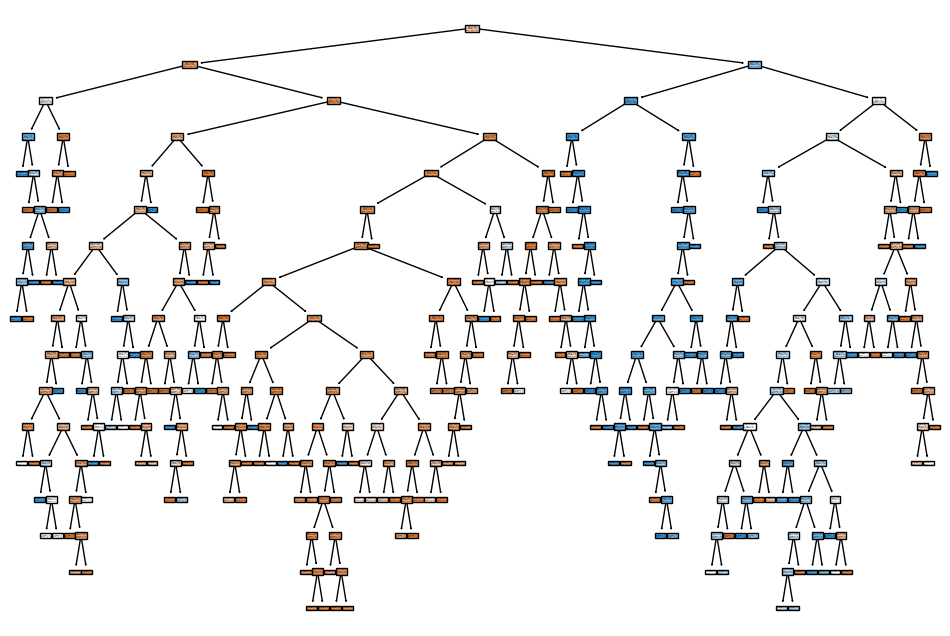

In [4]:
# Decision Tree, object creation and data fitting
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Predictions
survived_prediction = dt.predict(X_test)

# Show Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, filled=True)
plt.show()


Discussion: This is a normal dicision tree without any optimal hyperparameters.

Step 3: Use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. You may have a plot similar to (not necessarily the exact same as) below:

In [5]:
#Finding best parameters

tuned_parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11],
}

clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tuned_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

clf.fit(X_train, Y_train)
meanscore = clf.cv_results_['mean_test_score']
stdscore = clf.cv_results_['std_test_score']
for mean, std, params in zip(meanscore, stdscore, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
print()
print("Best parameters set:")
print(clf.best_params_)
app = []
for item in clf.best_params_.values():
    app.append(item)



0.787 (+/-0.071) for {'criterion': 'gini', 'max_leaf_nodes': 2}
0.774 (+/-0.053) for {'criterion': 'gini', 'max_leaf_nodes': 3}
0.767 (+/-0.063) for {'criterion': 'gini', 'max_leaf_nodes': 4}
0.784 (+/-0.059) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.793 (+/-0.074) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.800 (+/-0.083) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.806 (+/-0.079) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.812 (+/-0.056) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.814 (+/-0.047) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.812 (+/-0.042) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.787 (+/-0.071) for {'criterion': 'entropy', 'max_leaf_nodes': 2}
0.774 (+/-0.053) for {'criterion': 'entropy', 'max_leaf_nodes': 3}
0.770 (+/-0.060) for {'criterion': 'entropy', 'max_leaf_nodes': 4}
0.782 (+/-0.055) for {'criterion': 'entropy', 'max_leaf_nodes': 5}
0.791 (+/-0.065) for {'criterion': 'entropy', 'max_leaf_nodes': 6}
0.791 (+/-0.065) for {'

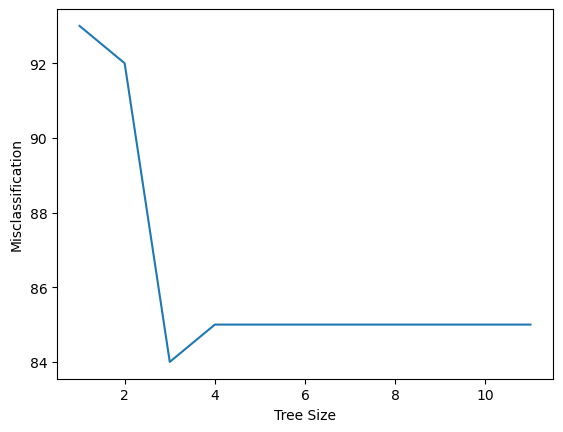

Discussion:

The best parameter to prune the tree:
Maximum leaf node:  10
Maximum leaf node:  3


In [6]:
#Plot a graph with the ‘tree size’ as the X-axis and ‘number of misclassification’ as the Y-axis

max_depth_check=[1,2,3,4,5,6,7,8,9,10,11]
misclassification = []

for i in max_depth_check:
    
    clf = DecisionTreeClassifier(max_depth=i,max_leaf_nodes=app[1])
    clf = clf.fit(X_train, Y_train)
    survived_prediction = clf.predict(X_test)
#     print(misclassified)
    misclassified = np.where(Y_test != survived_prediction)

    miss = []
    for j in misclassified:
        miss.extend(j)
    misclassification += [len(miss)]       

plt.plot(max_depth_check,misclassification)
plt.xlabel('Tree Size')
plt.ylabel('Misclassification')
plt.show()

print('Discussion:\n')
print('The best parameter to prune the tree:')
print('Maximum leaf node: ',app[1])
print('Maximum leaf node: ', 3 )

Step 4: Find the tree size that yields a minimum number of misclassifications. Choose the optimal tree size to prune the tree and plot the pruned tree (which shall be smaller than the tree you obtained in Step 2). Report the accuracy of pruned tree on the test set for the following:

percent survivors correctly predicted (on test set)

percent fatalities correctly predicted (on test set)

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       223
           1       0.78      0.71      0.74       170

    accuracy                           0.79       393
   macro avg       0.79      0.78      0.78       393
weighted avg       0.79      0.79      0.78       393



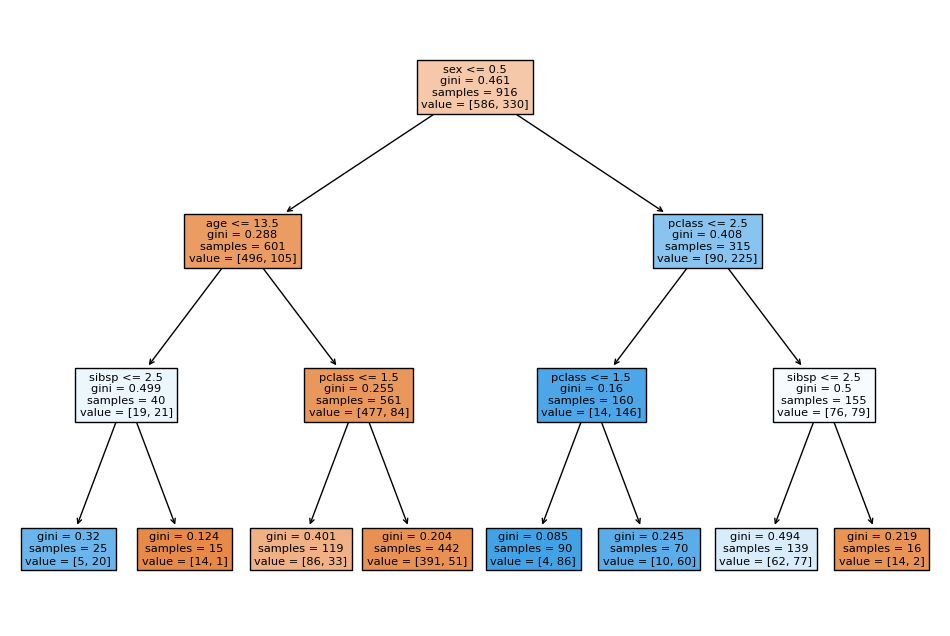

In [7]:

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Decision Tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=app[1])
clf.fit(X_train, Y_train)

# Predictions
y_pred = clf.predict(X_test)

# Print Classification Report
print("Detailed Classification Report:\n", classification_report(Y_test, y_pred))

# Convert feature names to a list
feature_names = X_train.columns.tolist()

# Plotting Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=feature_names)
plt.show()


In [8]:
y_pred_new = clf.predict(X_train)

#For training set
conf_matrix = confusion_matrix(Y_train, y_pred_new)
a = conf_matrix[0][0]
b = conf_matrix[1][0]
c = conf_matrix[1][1]
d = conf_matrix[0][1]
sensitivity_train = c/(c+b)
specificity_train = a/(d+a)

#for testing set
conf_matrix = confusion_matrix(Y_test, y_pred)
a = conf_matrix[0][0]
b = conf_matrix[1][0]
c = conf_matrix[1][1]
d = conf_matrix[0][1]
sensitivity_test = c/(c+b)
specificity_test = a/(d+a)


print("Percent survivors correctly predicted (on test set) : {0:.2f}%\n".format(sensitivity_test*100))
print("Percent fatalities correctly predicted (on test set) : {0:.2f}%\n".format(specificity_test*100))

Percent survivors correctly predicted (on test set) : 70.59%

Percent fatalities correctly predicted (on test set) : 84.75%



Step 5: Use the RandomForestClassifier() function to train a random forest using the optimal tree size you found in Step 4. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:

percent survivors correctly predicted (on test set) 

percent fatalities correctly predicted (on test set)

Check whether there is improvement as compared to a single tree obtained in Step 4. If not, please discuss the potential reasons.

In [9]:

# Create a random forest classifier with 50 estimators and the maximum depth
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth= 3, random_state=42)

# Fit the random forest on the training data
rf_classifier.fit(X_train, Y_train)

# Predict on the test set
survived_pred = rf_classifier.predict(X_test)

# Calculate the accuracy for survivors and fatalities
accuracy_survivors = accuracy_score(Y_test[Y_test == 1], survived_pred[Y_test == 1])
accuracy_fatalities = accuracy_score(Y_test[Y_test == 0], survived_pred[Y_test == 0])

print(f'Percent survivors correctly predicted (on test set) : {accuracy_survivors * 100:.2f}%')
print(f'Percent fatalities correctly predicted (on test set): {accuracy_fatalities * 100:.2f}%')


Percent survivors correctly predicted (on test set) : 68.24%
Percent fatalities correctly predicted (on test set): 85.20%


Discussion: From step 4 and step 5, percent survivors correctly predicted (on test set) and percent fatalities correctly predicted (on test set) are almost same. If we want different values for Random Forest Classifier then we need to take different hyper parameter values. 